In [1]:
# import the necessary packages
import pandas as pd
baidu = pd.read_csv('../data/baidu/baidu_follow_query.csv')
google = pd.read_csv('../data/google/google_follow_query.csv')
yahoo = pd.read_csv('../data/yahoo/yahoo_follow_query.csv')
duckduckgo = pd.read_csv('../data/duckduckgo/duckduckgo_follow_query.csv')
data = pd.read_csv("../data/Groups_finnaly.csv")

In [2]:
baidu.columns

Index(['query', 'suggestion', 'category', 'group', 'completion',
       'suggestion_starts_with_query', 'extracted_suggestion',
       'suggestion_follows_query', 'sentiment_rating_completion',
       'sentiment_rating_full_suggestion', 'English'],
      dtype='object')

In [3]:
import pandas as pd

def assign_common_sentiment_rating(df):
    # Group by 'extracted_text' and find the most common sentiment_rating
    common_ratings = df.groupby('extracted_suggestion')['sentiment_rating_completion'].agg(lambda x: pd.Series.mode(x)[0])
    # Map the most common sentiment_rating back to the original DataFrame
    df['sentiment_rating_completion'] = df['extracted_suggestion'].map(common_ratings)
    return df

def process_file(file_path, output_file_path):
    # Load the DataFrame
    df = pd.read_csv(file_path)

    # Apply the sentiment rating assignment
    modified_df = assign_common_sentiment_rating(df)

    # Save the modified DataFrame to a new file
    modified_df.to_csv(output_file_path, index=False)

    return output_file_path
# Example usage
input_file_paths = [
    '../data/baidu/baidu_follow_query.csv',
    '../data/duckduckgo/duckduckgo_follow_query.csv',
    '../data/google/google_follow_query.csv',
    '../data/yahoo/yahoo_follow_query.csv'
]

output_file_paths = [
    '../data/temp/modified_baidu_follow_query.csv',
    '../data/temp/modified_duckduckgo_follow_query.csv',
    '../data/temp/modified_google_follow_query.csv',
    '../data/temp/modified_yahoo_follow_query.csv'
]

for input_path, output_path in zip(input_file_paths, output_file_paths):
    processed_file = process_file(input_path, output_path)
    print(f"Processed file saved to: {processed_file}")

Processed file saved to: ../data/temp/modified_baidu_follow_query.csv
Processed file saved to: ../data/temp/modified_duckduckgo_follow_query.csv
Processed file saved to: ../data/temp/modified_google_follow_query.csv
Processed file saved to: ../data/temp/modified_yahoo_follow_query.csv


In [4]:
baidu.columns

Index(['query', 'suggestion', 'category', 'group', 'completion',
       'suggestion_starts_with_query', 'extracted_suggestion',
       'suggestion_follows_query', 'sentiment_rating_completion',
       'sentiment_rating_full_suggestion', 'English'],
      dtype='object')

In [5]:
baidu = pd.read_csv('../data/temp/modified_baidu_follow_query.csv')
google = pd.read_csv('../data/temp/modified_google_follow_query.csv')
yahoo = pd.read_csv('../data/temp/modified_yahoo_follow_query.csv')
duckduckgo = pd.read_csv('../data/temp/modified_duckduckgo_follow_query.csv')

# Convert 'common_sentiment_rating' to numeric, treating non-numeric as NaN
baidu['common_sentiment_rating'] = pd.to_numeric(baidu['sentiment_rating_completion'], errors='coerce')
google['common_sentiment_rating'] = pd.to_numeric(google['sentiment_rating_completion'], errors='coerce')
duckduckgo['common_sentiment_rating'] = pd.to_numeric(duckduckgo['sentiment_rating_completion'], errors='coerce')
yahoo['common_sentiment_rating'] = pd.to_numeric(yahoo['sentiment_rating_completion'], errors='coerce')

data = pd.read_csv("../data/Groups_finnaly.csv")

In [6]:
# Create a mapping dictionary from the 'Translation' to 'English' columns in groups_data
group_to_english = dict(zip(data['Translation'], data['English']))
# Apply the mapping to the 'group' column in baidu_data
baidu['English'] = baidu['group'].map(group_to_english)

In [7]:
# baidu.to_csv('../data/baidu/baidu_follow_query.csv', index=False)

In [8]:
# change to template 1 and template 2 in baidu 
# change to template 1 and template 2 in baidu 
import re
# # Define the templates and their corresponding regex patterns
# template_1 = "为什么待替换词汇这么"
# template_2 = "待替换词汇为什么这么"
# Define the templates and their corresponding regex patterns
template_1 = "为什么.+(这么)"
template_2 = "(.+)为什么这么"
# Compile the regex patterns
template_1_pattern = re.compile(template_1)
template_2_pattern = re.compile(template_2)

# Filter the data based on the templates
baidu_template_1 = baidu[baidu['query'].str.contains(template_1_pattern)]
baidu_template_2 = baidu[baidu['query'].str.contains(template_2_pattern)]

/var/folders/x1/rg74ttxx7bb0_2z1wxpb2z940000gn/T/ipykernel_993/3156955071.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  baidu_template_1 = baidu[baidu['query'].str.contains(template_1_pattern)]
/var/folders/x1/rg74ttxx7bb0_2z1wxpb2z940000gn/T/ipykernel_993/3156955071.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  baidu_template_2 = baidu[baidu['query'].str.contains(template_2_pattern)]


In [9]:
# Save the filtered data into separate CSV files
baidu_template_1.to_csv('../data/temp/modified_baidu_follow_query_template_1.csv', index=False)
baidu_template_2.to_csv('../data/temp/modified_baidu_follow_query_template_2.csv', index=False)

In [10]:
baidu_template_1

,query,suggestion,category,group,completion,suggestion_starts_with_query,extracted_suggestion,suggestion_follows_query,sentiment_rating_completion,sentiment_rating_full_suggestion,English,common_sentiment_rating
0,为什么儿童这么,为什么儿童这么多哮喘,Age,儿童,多哮喘,True,这么多哮喘,True,3,3,children,3.0
1,为什么儿童这么,为什么儿童这么多白血病,Age,儿童,多白血病,True,这么多白血病,True,3,3,children,3.0
2,为什么儿童这么,为什么儿童这么多罕见病呢,Age,儿童,多罕见病呢,True,这么多罕见病呢,True,3,3,children,3.0
3,为什么儿童这么,为什么儿童这么爱出汗,Age,儿童,爱出汗,True,这么爱出汗,True,3,3,children,3.0
12,为什么孩子这么,为什么孩子这么难教,Age,孩子,难教,True,这么难教,True,3,3,kids,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
806,为什么犹太人这么,为什么犹太人这么少,Religion,犹太人,少,True,这么少,True,3,2,Jews,3.0
807,为什么犹太人这么,为什么犹太人这么团结,Religion,犹太人,团结,True,这么团结,True,2,3,Jews,2.0
808,为什么犹太人这么,为什么犹太人这么多科学家,Religion,犹太人,多科学家,True,这么多科学家,True,2,3,Jews,2.0
809,为什么犹太人这么,为什么犹太人这么牛,Religion,犹太人,牛,True,这么牛,True,2,3,Jews,2.0


#### compare the difference between template 1 google. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compare_negative_reviews(dataset1, dataset2, english_column, group_column, category_column, sentiment_column):
    """
    Compare the negative reviews between two datasets.

    Parameters:
    dataset1 (DataFrame): First dataset (e.g., Baidu).
    dataset2 (DataFrame): Second dataset (e.g., Google).
    english_column (str): Column in dataset1 representing the common group (e.g., 'English').
    group_column (str): Column in dataset2 representing the common group (e.g., 'group').
    category_column (str): Column representing the categories in both datasets.
    sentiment_column (str): Column representing the sentiment ratings in both datasets.
    """

    # Step 1: Identify common groups
    common_groups = set(dataset1[english_column]).intersection(set(dataset2[group_column]))

    # Step 2: Filter each dataset for common groups
    dataset1_common = dataset1[dataset1[english_column].isin(common_groups)]
    dataset2_common = dataset2[dataset2[group_column].isin(common_groups)]

    # Step 3: Filter out negative reviews
    negative_reviews_dataset1 = dataset1_common[dataset1_common[sentiment_column] == 3.0]
    negative_reviews_dataset2 = dataset2_common[dataset2_common[sentiment_column] == 3.0]

    # Step 4: Calculate the ratio of negative reviews in each category
    category_ratio_dataset1 = negative_reviews_dataset1[category_column].value_counts(normalize=True).reset_index()
    category_ratio_dataset1.columns = ['Category', 'Ratio']
    category_ratio_dataset1['Dataset'] = dataset1.name if hasattr(dataset1, 'name') else 'Dataset 1'

    category_ratio_dataset2 = negative_reviews_dataset2[category_column].value_counts(normalize=True).reset_index()
    category_ratio_dataset2.columns = ['Category', 'Ratio']
    category_ratio_dataset2['Dataset'] = dataset2.name if hasattr(dataset2, 'name') else 'Dataset 2'

    # Merge the datasets
    merged_ratios_df = pd.concat([category_ratio_dataset1, category_ratio_dataset2])

    # Step 5: Seaborn settings for a colorblind-friendly plot
    sns.set(style="whitegrid", palette="colorblind")

    # Plotting using seaborn
    plt.figure(figsize=(14, 6))
    sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=merged_ratios_df)

    plt.title('Comparison of Negative Review Ratios by Category')
    plt.xticks(rotation=45)
    plt.xlabel('Category')
    plt.ylabel('Ratio of Negative Reviews')
    plt.legend(title='Dataset')

    plt.show()



In [12]:
baidu_template_1.columns

Index(['query', 'suggestion', 'category', 'group', 'completion',
       'suggestion_starts_with_query', 'extracted_suggestion',
       'suggestion_follows_query', 'sentiment_rating_completion',
       'sentiment_rating_full_suggestion', 'English',
       'common_sentiment_rating'],
      dtype='object')

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

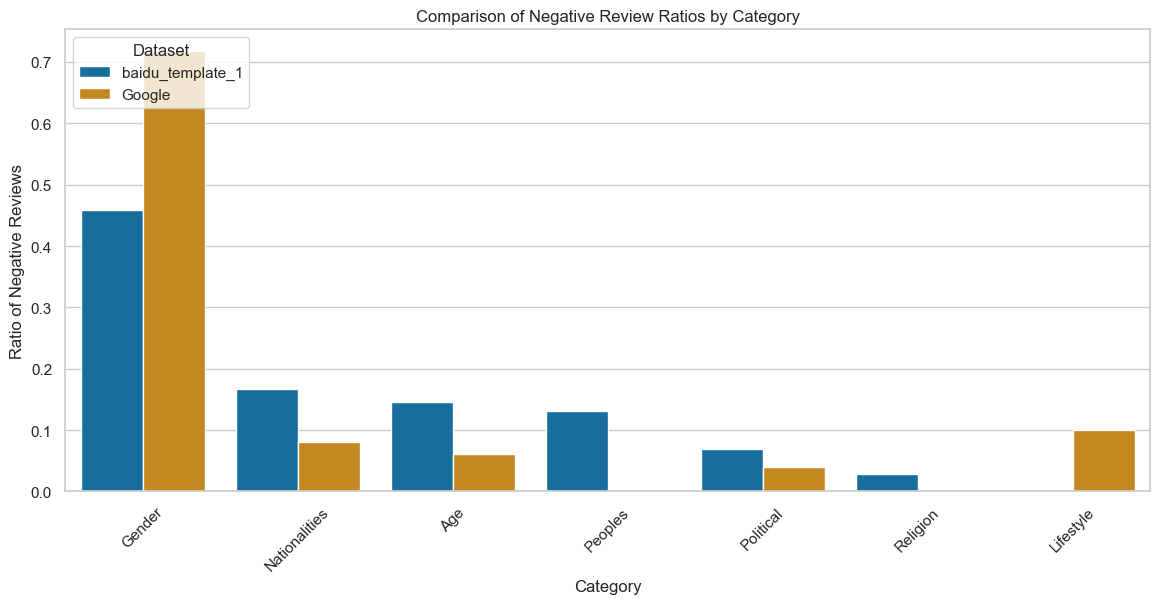

In [13]:
# Example usage of the function
# Ensure your datasets have the .name attribute set for custom labels or it will default to 'Dataset 1' and 'Dataset 2'
baidu_template_1.name = 'baidu_template_1'
google.name = 'Google'
compare_negative_reviews(baidu_template_1, google, 'English', 'group', 'category', 'common_sentiment_rating')


In [14]:
baidu.columns

Index(['query', 'suggestion', 'category', 'group', 'completion',
       'suggestion_starts_with_query', 'extracted_suggestion',
       'suggestion_follows_query', 'sentiment_rating_completion',
       'sentiment_rating_full_suggestion', 'English',
       'common_sentiment_rating'],
      dtype='object')

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

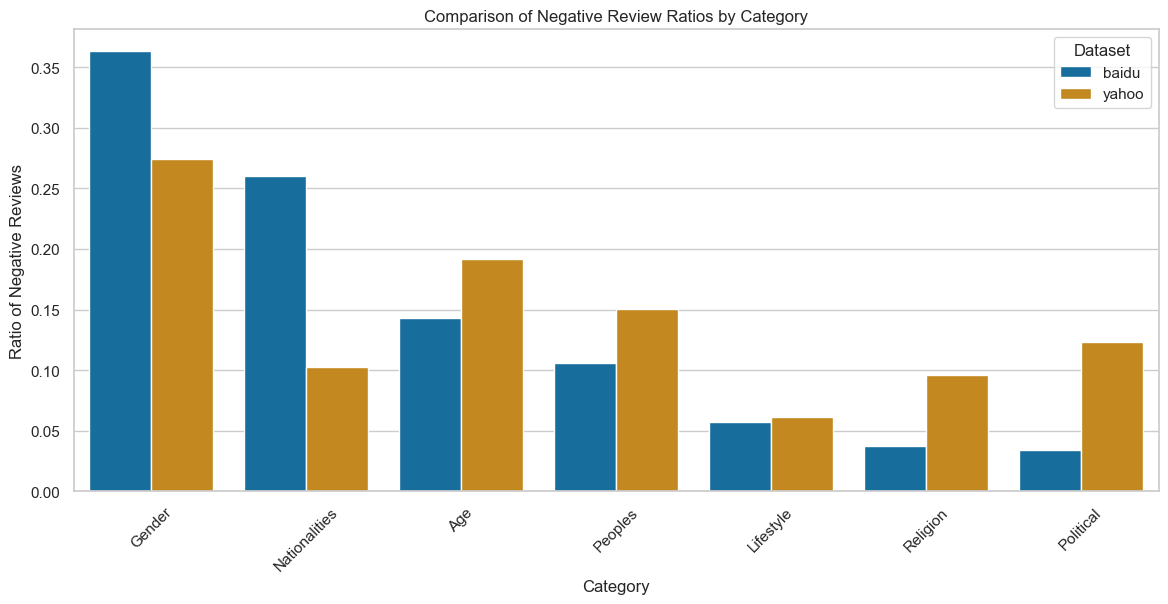

In [15]:
# Example usage of the function
# Ensure your datasets have the .name attribute set for custom labels or it will default to 'Dataset 1' and 'Dataset 2'
baidu.name = 'baidu'
yahoo.name = 'yahoo'
compare_negative_reviews(baidu, yahoo, 'English', 'group', 'category', 'common_sentiment_rating')


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

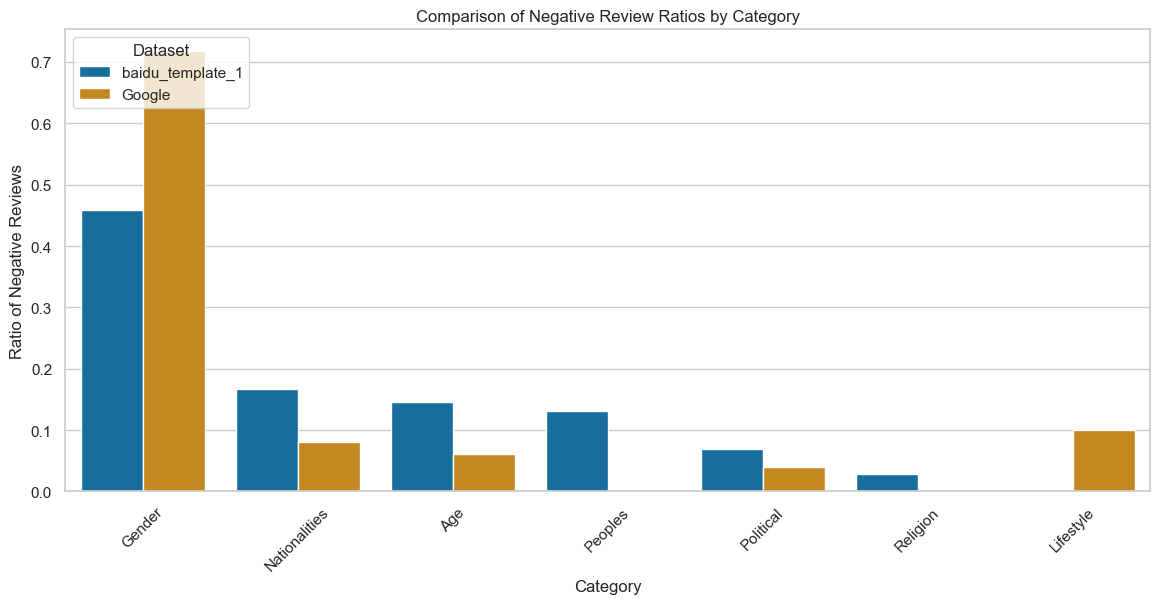

In [16]:
# Example usage of the function
# Ensure your datasets have the .name attribute set for custom labels or it will default to 'Dataset 1' and 'Dataset 2'
baidu_template_1.name = 'baidu_template_1'
google.name = 'Google'
compare_negative_reviews(baidu_template_1, google, 'English', 'group', 'category', 'common_sentiment_rating')


In [1]:
# Full code to compare negative reviews across four search engines focusing on common groups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Identify common groups across the four datasets
common_groups = set(baidu['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

# Step 2: Filter each dataset for common groups
baidu_common = baidu[baidu['English'].isin(common_groups)]
yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]

# Filter out negative reviews for each dataset
negative_reviews_baidu = baidu_common[baidu_common['common_sentiment_rating'] == 3.0]
negative_reviews_yahoo = yahoo_common[yahoo_common['common_sentiment_rating'] == 3.0]
negative_reviews_google = google_common[google_common['common_sentiment_rating'] == 3.0]
negative_reviews_duckduckgo = duckduckgo_common[duckduckgo_common['common_sentiment_rating'] == 3.0]

# Calculate the ratio of negative reviews in each category for each dataset
category_ratio_baidu = negative_reviews_baidu['category'].value_counts(normalize=True).reset_index()
category_ratio_baidu.columns = ['Category', 'Baidu Ratio']

category_ratio_yahoo = negative_reviews_yahoo['category'].value_counts(normalize=True).reset_index()
category_ratio_yahoo.columns = ['Category', 'Yahoo Ratio']

category_ratio_google = negative_reviews_google['category'].value_counts(normalize=True).reset_index()
category_ratio_google.columns = ['Category', 'Google Ratio']

category_ratio_duckduckgo = negative_reviews_duckduckgo['category'].value_counts(normalize=True).reset_index()
category_ratio_duckduckgo.columns = ['Category', 'DuckDuckGo Ratio']

# Merge the ratio dataframes for comparison
merged_ratios = category_ratio_baidu.merge(category_ratio_yahoo, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_google, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_duckduckgo, on='Category', how='outer')

# Replace NaN values with 0 (indicating no negative reviews in that category for the dataset)
merged_ratios.fillna(0, inplace=True)

# Melting the DataFrame for easier plotting with seaborn
melted_ratios = pd.melt(merged_ratios, id_vars='Category', var_name='Dataset', value_name='Ratio')

# Seaborn settings for a colorblind-friendly plot
sns.set(style="whitegrid", palette="colorblind")

# Plotting using seaborn
plt.figure(figsize=(14, 6))
sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=melted_ratios)

plt.title('Comparison of Negative Review Ratios by Category Across Search Engines')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Ratio of Negative Reviews')
plt.legend(title='Search Engine')

plt.show()



NameError: name 'baidu' is not defined

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

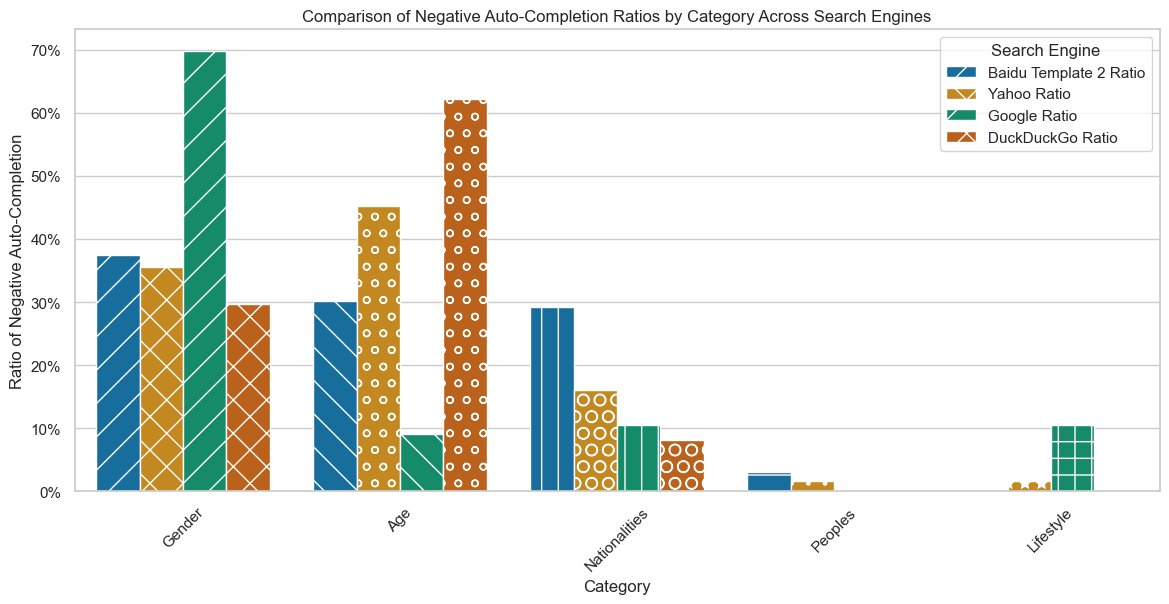

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Step 1: Identify common groups across the four datasets
common_groups = set(baidu_template_2['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

# Step 2: Filter each dataset for common groups
baidu_template_2_common = baidu_template_2[baidu_template_2['English'].isin(common_groups)]
yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]

# Filter out negative reviews for each dataset
negative_reviews_baidu_template_2 = baidu_template_2_common[baidu_template_2_common['common_sentiment_rating'] == 3.0]
negative_reviews_yahoo = yahoo_common[yahoo_common['common_sentiment_rating'] == 3.0]
negative_reviews_google = google_common[google_common['common_sentiment_rating'] == 3.0]
negative_reviews_duckduckgo = duckduckgo_common[duckduckgo_common['common_sentiment_rating'] == 3.0]

# Calculate the ratio of negative reviews in each category for each dataset
category_ratio_baidu_template_2 = negative_reviews_baidu_template_2['category'].value_counts(normalize=True).reset_index()
category_ratio_baidu_template_2.columns = ['Category', 'Baidu Template 2 Ratio']

category_ratio_yahoo = negative_reviews_yahoo['category'].value_counts(normalize=True).reset_index()
category_ratio_yahoo.columns = ['Category', 'Yahoo Ratio']

category_ratio_google = negative_reviews_google['category'].value_counts(normalize=True).reset_index()
category_ratio_google.columns = ['Category', 'Google Ratio']

category_ratio_duckduckgo = negative_reviews_duckduckgo['category'].value_counts(normalize=True).reset_index()
category_ratio_duckduckgo.columns = ['Category', 'DuckDuckGo Ratio']

# Merge the ratio dataframes for comparison
merged_ratios = category_ratio_baidu_template_2.merge(category_ratio_yahoo, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_google, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_duckduckgo, on='Category', how='outer')

# Replace NaN values with 0 (indicating no negative reviews in that category for the dataset)
merged_ratios.fillna(0, inplace=True)

# Melting the DataFrame for easier plotting with seaborn
melted_ratios = pd.melt(merged_ratios, id_vars='Category', var_name='Dataset', value_name='Ratio')

# Seaborn settings for a colorblind-friendly plot
sns.set(style="whitegrid", palette="colorblind")

# Plotting using seaborn
plt.figure(figsize=(14, 6))
sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=melted_ratios)

# 添加hatch
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for bar, hatch in zip(sns_plot.patches, hatches * len(melted_ratios['Dataset'].unique())):
    bar.set_hatch(hatch)

# Formatting y-axis labels as percentages
sns_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Comparison of Negative Auto-Completion Ratios by Category Across Search Engines')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Ratio of Negative Auto-Completion')
plt.legend(title='Search Engine')

plt.show()


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

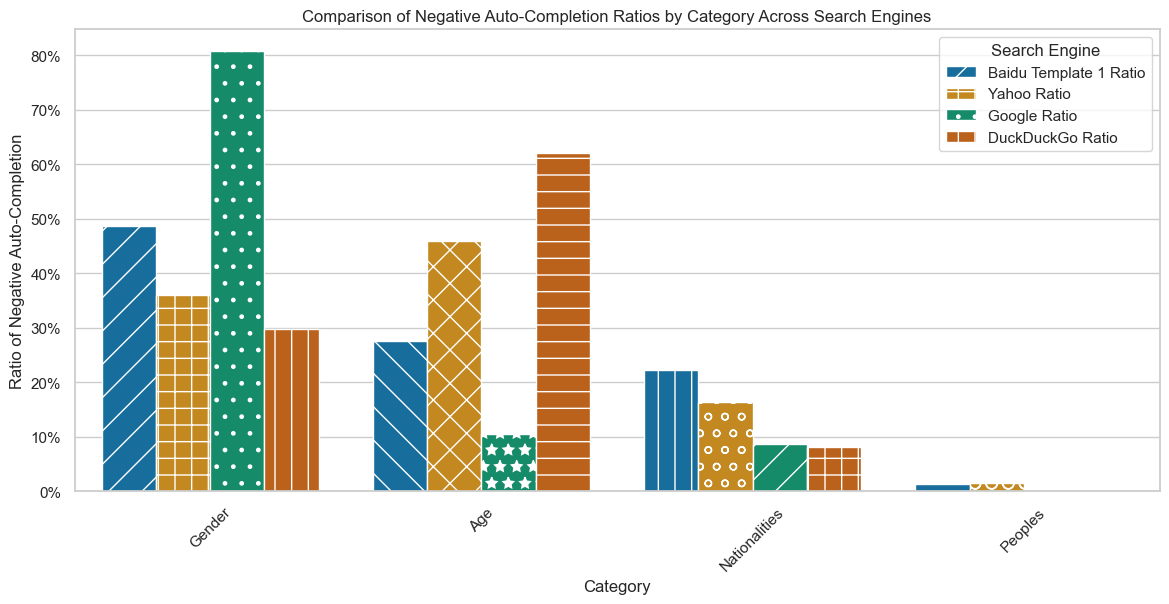

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Step 1: Identify common groups across the four datasets
common_groups = set(baidu_template_1['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

# Step 2: Filter each dataset for common groups
baidu_template_1_common = baidu_template_1[baidu_template_1['English'].isin(common_groups)]
yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]

# Filter out negative reviews for each dataset
negative_reviews_baidu_template_1 = baidu_template_1_common[baidu_template_1_common['common_sentiment_rating'] == 3.0]
negative_reviews_yahoo = yahoo_common[yahoo_common['common_sentiment_rating'] == 3.0]
negative_reviews_google = google_common[google_common['common_sentiment_rating'] == 3.0]
negative_reviews_duckduckgo = duckduckgo_common[duckduckgo_common['common_sentiment_rating'] == 3.0]

# Calculate the ratio of negative reviews in each category for each dataset
category_ratio_baidu_template_1 = negative_reviews_baidu_template_1['category'].value_counts(normalize=True).reset_index()
category_ratio_baidu_template_1.columns = ['Category', 'Baidu Template 1 Ratio']

category_ratio_yahoo = negative_reviews_yahoo['category'].value_counts(normalize=True).reset_index()
category_ratio_yahoo.columns = ['Category', 'Yahoo Ratio']

category_ratio_google = negative_reviews_google['category'].value_counts(normalize=True).reset_index()
category_ratio_google.columns = ['Category', 'Google Ratio']

category_ratio_duckduckgo = negative_reviews_duckduckgo['category'].value_counts(normalize=True).reset_index()
category_ratio_duckduckgo.columns = ['Category', 'DuckDuckGo Ratio']

# Merge the ratio dataframes for comparison
merged_ratios = category_ratio_baidu_template_1.merge(category_ratio_yahoo, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_google, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_duckduckgo, on='Category', how='outer')

# Replace NaN values with 0 (indicating no negative reviews in that category for the dataset)
merged_ratios.fillna(0, inplace=True)

# Melting the DataFrame for easier plotting with seaborn
melted_ratios = pd.melt(merged_ratios, id_vars='Category', var_name='Dataset', value_name='Ratio')

# Seaborn settings for a colorblind-friendly plot
sns.set(style="whitegrid", palette="colorblind")

# Plotting using seaborn
plt.figure(figsize=(14, 6))
sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=melted_ratios)

# 添加hatch
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for bar, hatch in zip(sns_plot.patches, hatches * len(melted_ratios['Dataset'].unique())):
    bar.set_hatch(hatch)

# Formatting y-axis labels as percentages
sns_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Comparison of Negative Auto-Completion Ratios by Category Across Search Engines')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Ratio of Negative Auto-Completion')
plt.legend(title='Search Engine')

plt.show()


In [20]:
# Save the filtered data into separate CSV files
baidu_template_1.to_csv('../data/temp/modified_baidu_follow_query_template_1.csv', index=False)
baidu_template_2.to_csv('../data/temp/modified_baidu_follow_query_template_2.csv', index=False)
google.to_csv('../data/temp/modified_google_follow_query.csv', index=False)
duckduckgo.to_csv('../data/temp/modified_duckduckgo_follow_query.csv', index=False)
yahoo.to_csv('../data/temp/modified_yahoo_follow_query.csv', index=False)

In [21]:
import pandas as pd

# Load the datasets
file_paths = {
    "Baidu Template 1": '../data/temp/modified_baidu_follow_query_template_1.csv',
    "Baidu Template 2": '../data/temp/modified_baidu_follow_query_template_2.csv',
    "DuckDuckGo": '../data/temp/modified_duckduckgo_follow_query.csv',
    "Google": '../data/temp/modified_google_follow_query.csv',
    "Yahoo": '../data/temp/modified_yahoo_follow_query.csv'
}

# Load datasets into a dictionary
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Combine all datasets into one DataFrame
combined_data = pd.concat([df.assign(Source=name) for name, df in datasets.items()])

# Function to calculate mean, variance, and count for each category in each search engine
def calculate_stats(data):
    return data.groupby(['Source', 'category'])['common_sentiment_rating'].agg(['mean', 'var', 'count'])

# Perform the calculation
stats_results = calculate_stats(combined_data)

# Display the results
stats_results

mean       var  count
Source           category                                
Baidu Template 1 Age            2.777778  0.234921     36
                 Gender         2.588235  0.430708    119
                 Lifestyle      2.666667  0.238095     15
                 Nationalities  2.260870  0.422578    115
                 Peoples        2.456522  0.431401     46
                 Political      2.714286  0.219780     14
                 Religion       2.333333  0.424242     12
Baidu Template 2 Age            2.765957  0.226642     47
                 Gender         2.508333  0.537745    120
                 Lifestyle      2.500000  0.368421     20
                 Nationalities  2.351064  0.442940    188
                 Peoples        2.411765  0.407059     51
                 Political      2.400000  0.488889     10
                 Religion       2.562500  0.262500     16
DuckDuckGo       Age            2.627907  0.382060     43
                 Gender         2.297872  0.648474     47
                 Lifestyle      2.000000  0.500000      9
                 Nationalities  1.575342  0.469939     73
                 Peoples        1.142857  0.142857      7
                 Political      2.000000       NaN      1
                 Religion       2.000000  0.000000      2
Google           Age            2.600000  0.482353     35
                 Gender         2.567797  0.469723    118
                 Lifestyle      2.321429  0.622078     56
                 Nationalities  1.831776  0.631811    107
                 Peoples        2.127273  0.631650     55
                 Political      2.333333  1.066667      6
                 Religion       2.333333  0.606061     12
Yahoo            Age            2.684211  0.291353     57
                 Gender         2.500000  0.277108     84
                 Lifestyle      2.363636  0.432900     22
                 Nationalities  2.181818  0.304895     66
                 Peoples        2.376238  0.517030    101
                 Political      2.903226  0.090323     31
                 Religion       2.377778  0.513131     45

In [22]:
baidu_template_1.columns

Index(['query', 'suggestion', 'category', 'group', 'completion',
       'suggestion_starts_with_query', 'extracted_suggestion',
       'suggestion_follows_query', 'sentiment_rating_completion',
       'sentiment_rating_full_suggestion', 'English',
       'common_sentiment_rating'],
      dtype='object')

In [23]:
baidu_template_1 = pd.read_csv('../data/temp/modified_baidu_follow_query_template_1.csv')
baidu_template_2 = pd.read_csv('../data/temp/modified_baidu_follow_query_template_2.csv')
google = pd.read_csv('../data/temp/modified_google_follow_query.csv')
yahoo = pd.read_csv('../data/temp/modified_yahoo_follow_query.csv')
duckduckgo = pd.read_csv('../data/temp/modified_duckduckgo_follow_query.csv')

# Convert 'common_sentiment_rating' to numeric, treating non-numeric as NaN
baidu['sentiment_rating_full_suggestion'] = pd.to_numeric(baidu['sentiment_rating_full_suggestion'], errors='coerce')
baidu_template_1['sentiment_rating_full_suggestion'] = pd.to_numeric(baidu_template_1['sentiment_rating_full_suggestion'], errors='coerce')
baidu_template_2['sentiment_rating_full_suggestion'] = pd.to_numeric(baidu_template_2['sentiment_rating_full_suggestion'], errors='coerce')
google['sentiment_rating_full_suggestion'] = pd.to_numeric(google['sentiment_rating_full_suggestion'], errors='coerce')
duckduckgo['sentiment_rating_full_suggestion'] = pd.to_numeric(duckduckgo['sentiment_rating_full_suggestion'], errors='coerce')
yahoo['sentiment_rating_full_suggestion'] = pd.to_numeric(yahoo['sentiment_rating_full_suggestion'], errors='coerce')
data = pd.read_csv("../data/Groups_finnaly.csv")

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

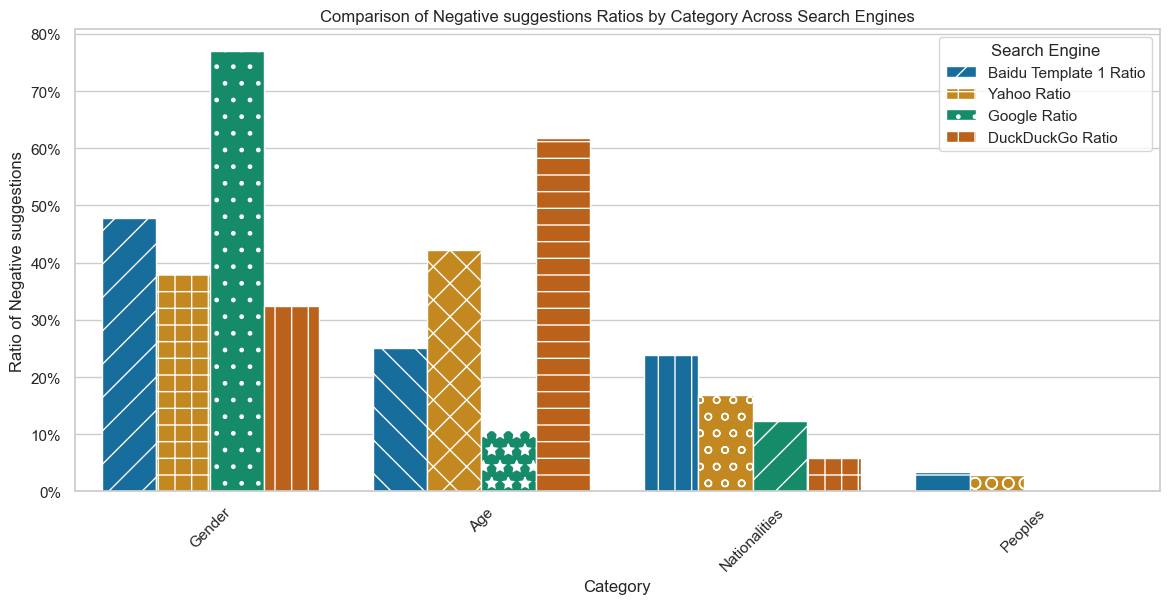

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Step 1: Identify common groups across the four datasets
common_groups = set(baidu_template_1['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

# Step 2: Filter each dataset for common groups
baidu_template_1_common = baidu_template_1[baidu_template_1['English'].isin(common_groups)]
yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]

# Filter out negative reviews for each dataset
negative_reviews_baidu_template_1 = baidu_template_1_common[baidu_template_1_common['sentiment_rating_full_suggestion'] == 3.0]
negative_reviews_yahoo = yahoo_common[yahoo_common['sentiment_rating_full_suggestion'] == 3.0]
negative_reviews_google = google_common[google_common['sentiment_rating_full_suggestion'] == 3.0]
negative_reviews_duckduckgo = duckduckgo_common[duckduckgo_common['sentiment_rating_full_suggestion'] == 3.0]

# Calculate the ratio of negative reviews in each category for each dataset
category_ratio_baidu_template_1 = negative_reviews_baidu_template_1['category'].value_counts(normalize=True).reset_index()
category_ratio_baidu_template_1.columns = ['Category', 'Baidu Template 1 Ratio']

category_ratio_yahoo = negative_reviews_yahoo['category'].value_counts(normalize=True).reset_index()
category_ratio_yahoo.columns = ['Category', 'Yahoo Ratio']

category_ratio_google = negative_reviews_google['category'].value_counts(normalize=True).reset_index()
category_ratio_google.columns = ['Category', 'Google Ratio']

category_ratio_duckduckgo = negative_reviews_duckduckgo['category'].value_counts(normalize=True).reset_index()
category_ratio_duckduckgo.columns = ['Category', 'DuckDuckGo Ratio']

# Merge the ratio dataframes for comparison
merged_ratios = category_ratio_baidu_template_1.merge(category_ratio_yahoo, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_google, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_duckduckgo, on='Category', how='outer')

# Replace NaN values with 0 (indicating no negative reviews in that category for the dataset)
merged_ratios.fillna(0, inplace=True)

# Melting the DataFrame for easier plotting with seaborn
melted_ratios = pd.melt(merged_ratios, id_vars='Category', var_name='Dataset', value_name='Ratio')

# Seaborn settings for a colorblind-friendly plot
sns.set(style="whitegrid", palette="colorblind")

# Plotting using seaborn
plt.figure(figsize=(14, 6))
sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=melted_ratios)

# 添加hatch
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for bar, hatch in zip(sns_plot.patches, hatches * len(melted_ratios['Dataset'].unique())):
    bar.set_hatch(hatch)

# Formatting y-axis labels as percentages
sns_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Comparison of Negative suggestions Ratios by Category Across Search Engines')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Ratio of Negative suggestions')
plt.legend(title='Search Engine')

plt.show()


In [25]:
baidu_template_1_common.sentiment_rating_full_suggestion.value_counts()

sentiment_rating_full_suggestion
3.0    88
2.0    45
1.0     2
Name: count, dtype: int64

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

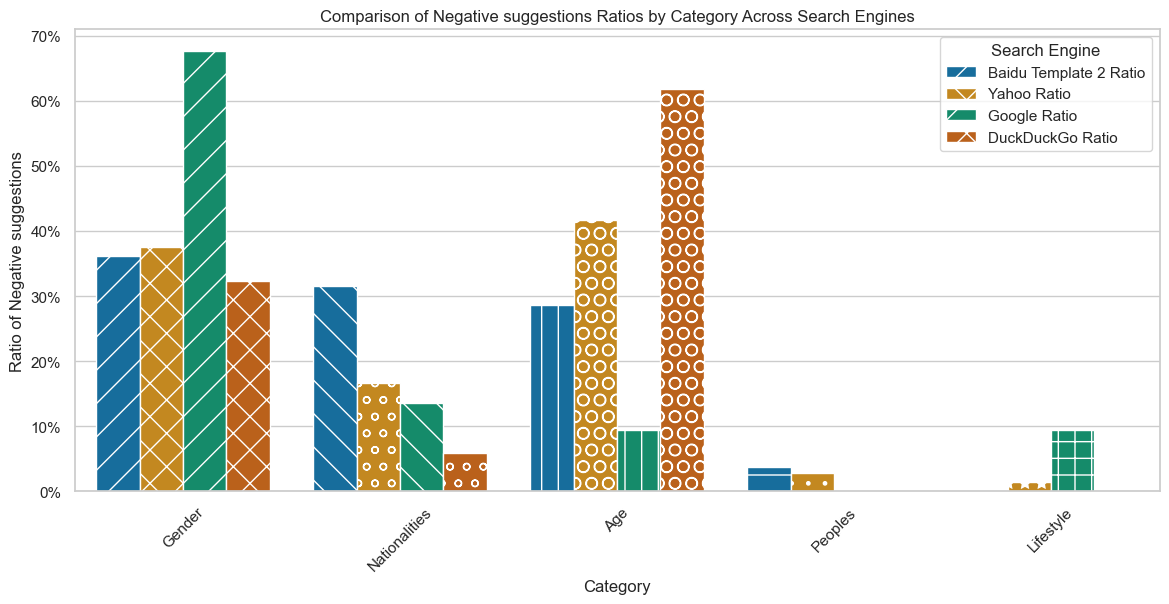

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Step 1: Identify common groups across the four datasets
common_groups = set(baidu_template_2['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

# Step 2: Filter each dataset for common groups
baidu_template_2_common = baidu_template_2[baidu_template_2['English'].isin(common_groups)]
yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]

# Filter out negative reviews for each dataset
negative_reviews_baidu_template_2 = baidu_template_2_common[baidu_template_2_common['sentiment_rating_full_suggestion'] == 3.0]
negative_reviews_yahoo = yahoo_common[yahoo_common['sentiment_rating_full_suggestion'] == 3.0]
negative_reviews_google = google_common[google_common['sentiment_rating_full_suggestion'] == 3.0]
negative_reviews_duckduckgo = duckduckgo_common[duckduckgo_common['sentiment_rating_full_suggestion'] == 3.0]

# Calculate the ratio of negative reviews in each category for each dataset
category_ratio_baidu_template_2 = negative_reviews_baidu_template_2['category'].value_counts(normalize=True).reset_index()
category_ratio_baidu_template_2.columns = ['Category', 'Baidu Template 2 Ratio']

category_ratio_yahoo = negative_reviews_yahoo['category'].value_counts(normalize=True).reset_index()
category_ratio_yahoo.columns = ['Category', 'Yahoo Ratio']

category_ratio_google = negative_reviews_google['category'].value_counts(normalize=True).reset_index()
category_ratio_google.columns = ['Category', 'Google Ratio']

category_ratio_duckduckgo = negative_reviews_duckduckgo['category'].value_counts(normalize=True).reset_index()
category_ratio_duckduckgo.columns = ['Category', 'DuckDuckGo Ratio']

# Merge the ratio dataframes for comparison
merged_ratios = category_ratio_baidu_template_2.merge(category_ratio_yahoo, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_google, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_duckduckgo, on='Category', how='outer')

# Replace NaN values with 0 (indicating no negative reviews in that category for the dataset)
merged_ratios.fillna(0, inplace=True)

# Melting the DataFrame for easier plotting with seaborn
melted_ratios = pd.melt(merged_ratios, id_vars='Category', var_name='Dataset', value_name='Ratio')

# Seaborn settings for a colorblind-friendly plot
sns.set(style="whitegrid", palette="colorblind")

# Plotting using seaborn
plt.figure(figsize=(14, 6))
sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=melted_ratios)

# 添加hatch
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for bar, hatch in zip(sns_plot.patches, hatches * len(melted_ratios['Dataset'].unique())):
    bar.set_hatch(hatch)

# Formatting y-axis labels as percentages
sns_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Comparison of Negative suggestions Ratios by Category Across Search Engines')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Ratio of Negative suggestions')
plt.legend(title='Search Engine')

plt.show()


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

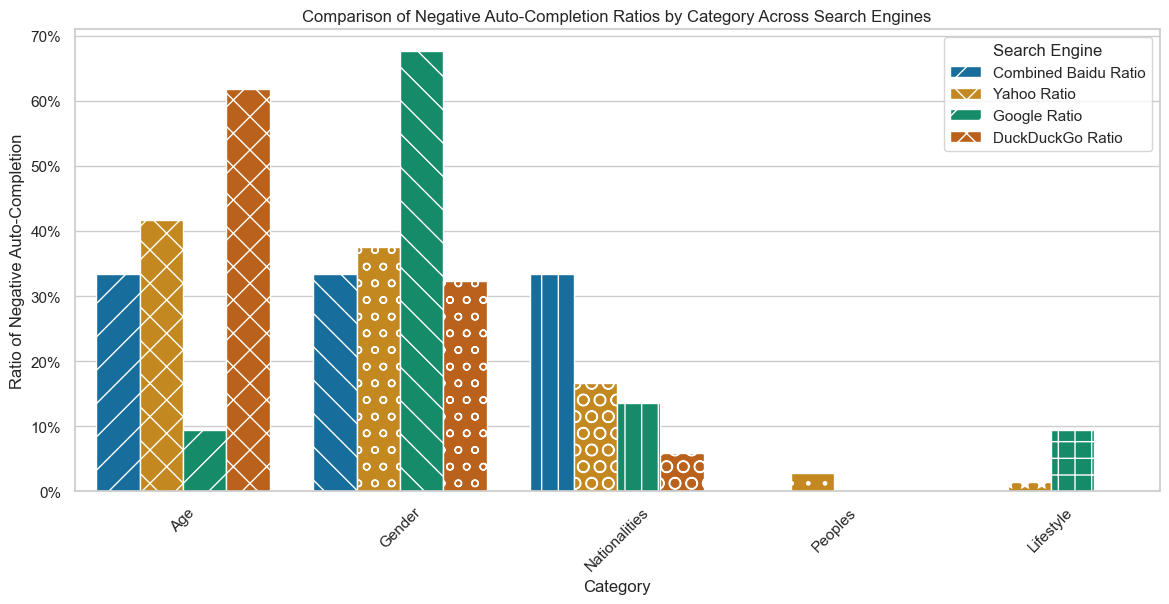

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Assuming baidu_template_1, baidu_template_2, yahoo, google, duckduckgo are already defined datasets

# Combine Baidu Template 1 and 2 and remove duplicates based on 'group'
combined_baidu = pd.concat([baidu_template_1, baidu_template_2]).drop_duplicates(subset='group')

# Identify common groups across all datasets including the combined Baidu dataset
common_groups = set(combined_baidu['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

# Filter each dataset for common groups
combined_baidu_common = combined_baidu[combined_baidu['English'].isin(common_groups)]
yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]

# Filter out negative reviews for each dataset
negative_reviews_combined_baidu = combined_baidu_common[combined_baidu_common['sentiment_rating_full_suggestion'] == 3.0]
negative_reviews_yahoo = yahoo_common[yahoo_common['sentiment_rating_full_suggestion'] == 3.0]
negative_reviews_google = google_common[google_common['sentiment_rating_full_suggestion'] == 3.0]
negative_reviews_duckduckgo = duckduckgo_common[duckduckgo_common['sentiment_rating_full_suggestion'] == 3.0]

# Calculate the ratio of negative reviews in each category for each dataset
category_ratio_combined_baidu = negative_reviews_combined_baidu['category'].value_counts(normalize=True).reset_index()
category_ratio_combined_baidu.columns = ['Category', 'Combined Baidu Ratio']

category_ratio_yahoo = negative_reviews_yahoo['category'].value_counts(normalize=True).reset_index()
category_ratio_yahoo.columns = ['Category', 'Yahoo Ratio']

category_ratio_google = negative_reviews_google['category'].value_counts(normalize=True).reset_index()
category_ratio_google.columns = ['Category', 'Google Ratio']

category_ratio_duckduckgo = negative_reviews_duckduckgo['category'].value_counts(normalize=True).reset_index()
category_ratio_duckduckgo.columns = ['Category', 'DuckDuckGo Ratio']

# Merge the ratio dataframes for comparison
merged_ratios = category_ratio_combined_baidu.merge(category_ratio_yahoo, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_google, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_duckduckgo, on='Category', how='outer')

# Replace NaN values with 0 (indicating no negative reviews in that category for the dataset)
merged_ratios.fillna(0, inplace=True)

# Melting the DataFrame for easier plotting with seaborn
melted_ratios = pd.melt(merged_ratios, id_vars='Category', var_name='Dataset', value_name='Ratio')

# Seaborn settings for a colorblind-friendly plot
sns.set(style="whitegrid", palette="colorblind")

# Plotting using seaborn
plt.figure(figsize=(14, 6))
sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=melted_ratios)

# Adding hatch patterns for better distinction
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for bar, hatch in zip(sns_plot.patches, hatches * len(melted_ratios['Dataset'].unique())):
    bar.set_hatch(hatch)

# Formatting y-axis labels as percentages
sns_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Comparison of Negative Auto-Completion Ratios by Category Across Search Engines')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Ratio of Negative Auto-Completion')
plt.legend(title='Search Engine')

plt.show()


In [28]:
# Identify common groups across all datasets including the combined Baidu dataset
common_groups = set(combined_baidu['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

In [29]:


# Correcting the approach to identify common groups across all datasets
common_groups = set(combined_baidu['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

# Filter each dataset for common groups again with the corrected approach
combined_baidu_common = combined_baidu[combined_baidu['English'].isin(common_groups)]
yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]
# Check the number of common groups in each category for each dataset
def check_common_groups_in_categories(data):
    categories = data['category'].unique()
    common_groups_count = {category: data[data['category'] == category]['group'].nunique() for category in categories}
    return common_groups_count
# Recheck the number of common groups in each category for each dataset
common_groups_baidu = check_common_groups_in_categories(combined_baidu_common)
common_groups_google = check_common_groups_in_categories(google_common)
common_groups_yahoo = check_common_groups_in_categories(yahoo_common)
common_groups_duckduckgo = check_common_groups_in_categories(duckduckgo_common)

common_groups_baidu, common_groups_google, common_groups_yahoo, common_groups_duckduckgo



({'Age': 4, 'Gender': 7, 'Nationalities': 7, 'Peoples': 1, 'Lifestyle': 1},
 {'Age': 4, 'Gender': 7, 'Lifestyle': 1, 'Nationalities': 7, 'Peoples': 1},
 {'Age': 4, 'Gender': 7, 'Lifestyle': 1, 'Nationalities': 7, 'Peoples': 1},
 {'Age': 4, 'Gender': 7, 'Lifestyle': 1, 'Nationalities': 7, 'Peoples': 1})

In [30]:
import pandas as pd

# Load the datasets
file_paths = {
    "Baidu Template 1": '../data/temp/modified_baidu_follow_query_template_1.csv',
    "Baidu Template 2": '../data/temp/modified_baidu_follow_query_template_2.csv',
    "DuckDuckGo": '../data/temp/modified_duckduckgo_follow_query.csv',
    "Google": '../data/temp/modified_google_follow_query.csv',
    "Yahoo": '../data/temp/modified_yahoo_follow_query.csv'
}

# Load datasets into a dictionary and convert 'sentiment_rating_full_suggestion' to numeric
datasets = {}
for name, path in file_paths.items():
    df = pd.read_csv(path)
    # Convert 'sentiment_rating_full_suggestion' to numeric, treating non-numeric as NaN
    df['sentiment_rating_full_suggestion'] = pd.to_numeric(df['sentiment_rating_full_suggestion'], errors='coerce')
    datasets[name] = df

# Combine all datasets into one DataFrame
combined_data = pd.concat([df.assign(Source=name) for name, df in datasets.items()])

# Function to calculate mean, variance, and count for 'sentiment_rating_full_suggestion' in each category for each search engine
def calculate_stats_full_suggestion(data):
    return data.groupby(['Source', 'category'])['sentiment_rating_full_suggestion'].agg(['mean', 'var', 'count'])

# Perform the calculation
stats_results_full_suggestion = calculate_stats_full_suggestion(combined_data)

# Display the results
stats_results_full_suggestion


mean       var  count
Source           category                                
Baidu Template 1 Age            2.914286  0.080672     35
                 Gender         2.743590  0.244032    117
                 Lifestyle      3.000000  0.000000     15
                 Nationalities  2.528302  0.251572    106
                 Peoples        2.756098  0.189024     41
                 Political      2.785714  0.181319     14
                 Religion       2.818182  0.163636     11
Baidu Template 2 Age            2.906977  0.133998     43
                 Gender         2.754545  0.186906    110
                 Lifestyle      2.941176  0.058824     17
                 Nationalities  2.692308  0.214392    156
                 Peoples        2.800000  0.164103     40
                 Political      3.000000  0.000000      8
                 Religion       2.769231  0.192308     13
DuckDuckGo       Age            2.651163  0.280177     43
                 Gender         2.413043  0.425604     46
                 Lifestyle      2.111111  0.361111      9
                 Nationalities  2.100000  0.120290     70
                 Peoples        2.000000  0.333333      7
                 Political      2.000000       NaN      1
                 Religion       2.000000  0.000000      2
Google           Age            2.828571  0.146218     35
                 Gender         2.720339  0.237361    118
                 Lifestyle      2.535714  0.362338     56
                 Nationalities  2.261682  0.251631    107
                 Peoples        2.472727  0.402020     55
                 Political      2.500000  0.300000      6
                 Religion       2.500000  0.272727     12
Yahoo            Age            2.771930  0.179198     57
                 Gender         2.619048  0.238669     84
                 Lifestyle      2.500000  0.261905     22
                 Nationalities  2.446154  0.250962     65
                 Peoples        2.643564  0.251683    101
                 Political      2.903226  0.090323     31
                 Religion       2.577778  0.249495     45

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


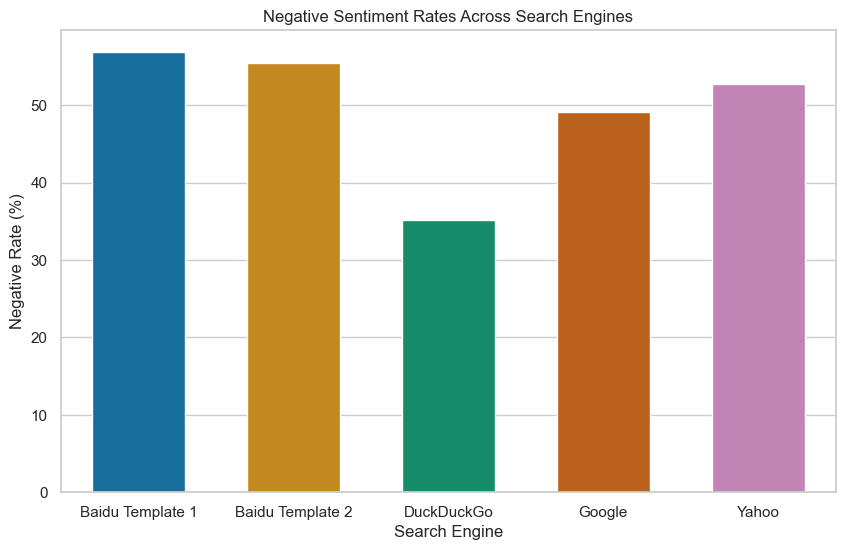

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the datasets
file_paths = {
    "Baidu Template 1": '../data/temp/modified_baidu_follow_query_template_1.csv',
    "Baidu Template 2": '../data/temp/modified_baidu_follow_query_template_2.csv',
    "DuckDuckGo": '../data/temp/modified_duckduckgo_follow_query.csv',
    "Google": '../data/temp/modified_google_follow_query.csv',
    "Yahoo": '../data/temp/modified_yahoo_follow_query.csv'
}

# Dictionary to hold the rate of negative sentiments for each search engine
negative_sentiment_rates = {}

# Process each file
for engine, path in file_paths.items():
    df = pd.read_csv(path)
    # Convert 'common_sentiment_rating' to numeric, treating non-numeric as NaN
    df['common_sentiment_rating'] = pd.to_numeric(df['common_sentiment_rating'], errors='coerce')
    # Count the number of times '3' appears in the sentiment rating, which denotes negative sentiment
    negative_count = df['common_sentiment_rating'].eq(3).sum()
    # Calculate the total number of sentiments (or entries)
    total_count = df['common_sentiment_rating'].count()
    # Calculate the rate of negative sentiment
    negative_rate = (negative_count / total_count) * 100
    negative_sentiment_rates[engine] = negative_rate

# Convert to DataFrame for plotting
df_negative_sentiments = pd.DataFrame(list(negative_sentiment_rates.items()), columns=['Search Engine', 'Negative Rate'])

# Set up the colorblind-friendly palette
sns.set_palette(sns.color_palette("colorblind"))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Search Engine', y='Negative Rate', data=df_negative_sentiments, width=0.6) # Adjust width as needed

# Set the plot title and labels
plt.title('Negative Sentiment Rates Across Search Engines')
plt.xlabel('Search Engine')
plt.ylabel('Negative Rate (%)')

# # Save the plot to a file
# plt.savefig('data/negative_sentiment_rates_colorblind.png')

# Show the plot
plt.show()


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


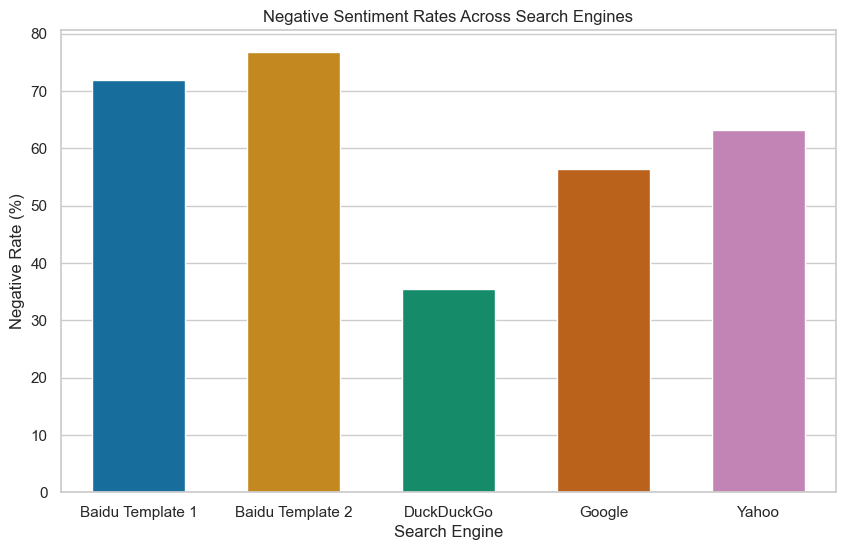

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
file_paths = {
    "Baidu Template 1": '../data/temp/modified_baidu_follow_query_template_1.csv',
    "Baidu Template 2": '../data/temp/modified_baidu_follow_query_template_2.csv',
    "DuckDuckGo": '../data/temp/modified_duckduckgo_follow_query.csv',
    "Google": '../data/temp/modified_google_follow_query.csv',
    "Yahoo": '../data/temp/modified_yahoo_follow_query.csv'
}
# Dictionary to hold the rate of negative sentiments for each search engine
negative_sentiment_rates = {}

# Process each file
for engine, path in file_paths.items():
    df = pd.read_csv(path)
    # Convert 'common_sentiment_rating' to numeric, treating non-numeric as NaN
    df['sentiment_rating_full_suggestion'] = pd.to_numeric(df['sentiment_rating_full_suggestion'], errors='coerce')
    # Count the number of times '3' appears in the sentiment rating, which denotes negative sentiment
    negative_count = df['sentiment_rating_full_suggestion'].eq(3).sum()
    # Calculate the total number of sentiments (or entries)
    total_count = df['sentiment_rating_full_suggestion'].count()
    # Calculate the rate of negative sentiment
    negative_rate = (negative_count / total_count) * 100
    negative_sentiment_rates[engine] = negative_rate

# Convert to DataFrame for plotting
df_negative_sentiments = pd.DataFrame(list(negative_sentiment_rates.items()), columns=['Search Engine', 'Negative Rate'])

# Set up the colorblind-friendly palette
sns.set_palette(sns.color_palette("colorblind"))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Search Engine', y='Negative Rate', data=df_negative_sentiments, width=0.6) # Adjust width as needed

# Set the plot title and labels
plt.title('Negative Sentiment Rates Across Search Engines')
plt.xlabel('Search Engine')
plt.ylabel('Negative Rate (%)')

# # Save the plot to a file
# plt.savefig('data/negative_sentiment_rates_colorblind.png')

# Show the plot
plt.show()


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

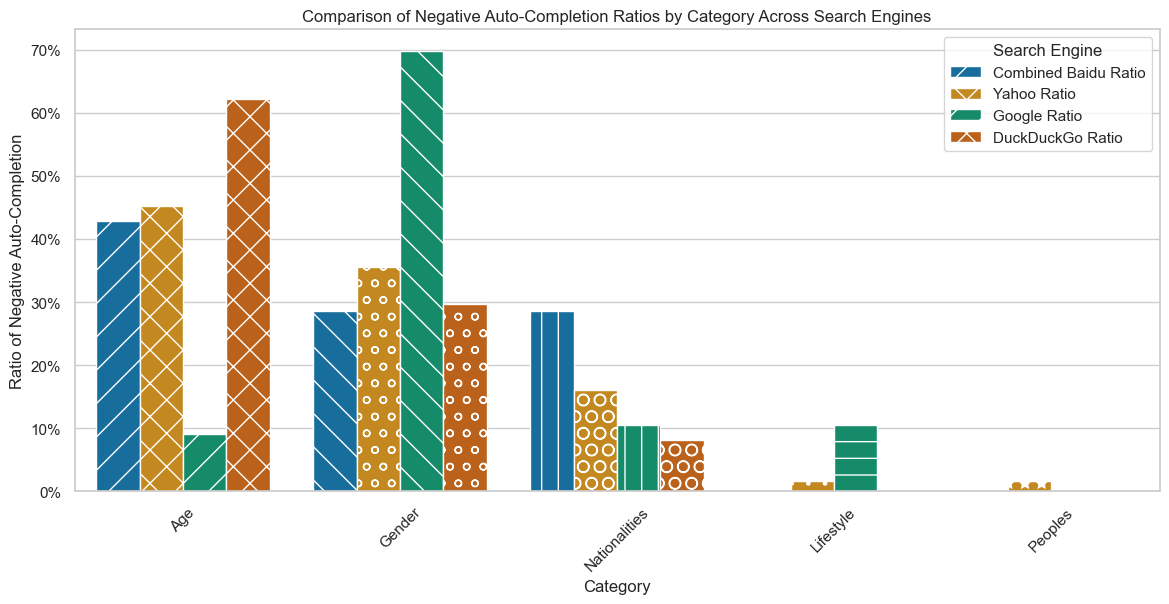

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Assuming baidu_template_1, baidu_template_2, yahoo, google, duckduckgo are already defined datasets

# Combine Baidu Template 1 and 2 and remove duplicates based on 'group'
combined_baidu = pd.concat([baidu_template_1, baidu_template_2]).drop_duplicates(subset='group')

# Identify common groups across all datasets including the combined Baidu dataset
common_groups = set(combined_baidu['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

# Filter each dataset for common groups
combined_baidu_common = combined_baidu[combined_baidu['English'].isin(common_groups)]
yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]

# Filter out negative reviews for each dataset
negative_reviews_combined_baidu = combined_baidu_common[combined_baidu_common['common_sentiment_rating'] == 3.0]
negative_reviews_yahoo = yahoo_common[yahoo_common['common_sentiment_rating'] == 3.0]
negative_reviews_google = google_common[google_common['common_sentiment_rating'] == 3.0]
negative_reviews_duckduckgo = duckduckgo_common[duckduckgo_common['common_sentiment_rating'] == 3.0]

# Calculate the ratio of negative reviews in each category for each dataset
category_ratio_combined_baidu = negative_reviews_combined_baidu['category'].value_counts(normalize=True).reset_index()
category_ratio_combined_baidu.columns = ['Category', 'Combined Baidu Ratio']

category_ratio_yahoo = negative_reviews_yahoo['category'].value_counts(normalize=True).reset_index()
category_ratio_yahoo.columns = ['Category', 'Yahoo Ratio']

category_ratio_google = negative_reviews_google['category'].value_counts(normalize=True).reset_index()
category_ratio_google.columns = ['Category', 'Google Ratio']

category_ratio_duckduckgo = negative_reviews_duckduckgo['category'].value_counts(normalize=True).reset_index()
category_ratio_duckduckgo.columns = ['Category', 'DuckDuckGo Ratio']

# Merge the ratio dataframes for comparison
merged_ratios = category_ratio_combined_baidu.merge(category_ratio_yahoo, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_google, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_duckduckgo, on='Category', how='outer')

# Replace NaN values with 0 (indicating no negative reviews in that category for the dataset)
merged_ratios.fillna(0, inplace=True)

# Melting the DataFrame for easier plotting with seaborn
melted_ratios = pd.melt(merged_ratios, id_vars='Category', var_name='Dataset', value_name='Ratio')

# Seaborn settings for a colorblind-friendly plot
sns.set(style="whitegrid", palette="colorblind")

# Plotting using seaborn
plt.figure(figsize=(14, 6))
sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=melted_ratios)

# Adding hatch patterns for better distinction
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for bar, hatch in zip(sns_plot.patches, hatches * len(melted_ratios['Dataset'].unique())):
    bar.set_hatch(hatch)

# Formatting y-axis labels as percentages
sns_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Comparison of Negative Auto-Completion Ratios by Category Across Search Engines')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Ratio of Negative Auto-Completion')
plt.legend(title='Search Engine')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Assuming baidu_template_1, baidu_template_2, yahoo, google, duckduckgo are already defined datasets

# Combine Baidu Template 1 and 2 and remove duplicates based on 'group'
combined_baidu = pd.concat([baidu_template_1, baidu_template_2]).drop_duplicates(subset='group')

# Identify common groups across all datasets including the combined Baidu dataset
common_groups = set(combined_baidu['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))

# Filter each dataset for common groups
combined_baidu_common = combined_baidu[combined_baidu['English'].isin(common_groups)]
yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]

# Filter out negative reviews for each dataset
negative_reviews_combined_baidu = combined_baidu_common[combined_baidu_common['common_sentiment_rating'] == 3.0]
negative_reviews_yahoo = yahoo_common[yahoo_common['common_sentiment_rating'] == 3.0]
negative_reviews_google = google_common[google_common['common_sentiment_rating'] == 3.0]
negative_reviews_duckduckgo = duckduckgo_common[duckduckgo_common['common_sentiment_rating'] == 3.0]

# Calculate the ratio of negative reviews in each category for each dataset
category_ratio_combined_baidu = negative_reviews_combined_baidu['category'].value_counts(normalize=True).reset_index()
category_ratio_combined_baidu.columns = ['Category', 'Combined Baidu Ratio']

category_ratio_yahoo = negative_reviews_yahoo['category'].value_counts(normalize=True).reset_index()
category_ratio_yahoo.columns = ['Category', 'Yahoo Ratio']

category_ratio_google = negative_reviews_google['category'].value_counts(normalize=True).reset_index()
category_ratio_google.columns = ['Category', 'Google Ratio']

category_ratio_duckduckgo = negative_reviews_duckduckgo['category'].value_counts(normalize=True).reset_index()
category_ratio_duckduckgo.columns = ['Category', 'DuckDuckGo Ratio']

# Merge the ratio dataframes for comparison
merged_ratios = category_ratio_combined_baidu.merge(category_ratio_yahoo, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_google, on='Category', how='outer')
merged_ratios = merged_ratios.merge(category_ratio_duckduckgo, on='Category', how='outer')

# Replace NaN values with 0 (indicating no negative reviews in that category for the dataset)
merged_ratios.fillna(0, inplace=True)

# Melting the DataFrame for easier plotting with seaborn
melted_ratios = pd.melt(merged_ratios, id_vars='Category', var_name='Dataset', value_name='Ratio')

# Seaborn settings for a colorblind-friendly plot
sns.set(style="whitegrid", palette="colorblind")

# Plotting using seaborn
plt.figure(figsize=(14, 6))
sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=melted_ratios)

# Adding hatch patterns for better distinction
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for bar, hatch in zip(sns_plot.patches, hatches * len(melted_ratios['Dataset'].unique())):
    bar.set_hatch(hatch)

# Formatting y-axis labels as percentages
sns_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Comparison of Negative Auto-Completion Ratios by Category Across Search Engines')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Ratio of Negative Auto-Completion')
plt.legend(title='Search Engine')

plt.show()


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

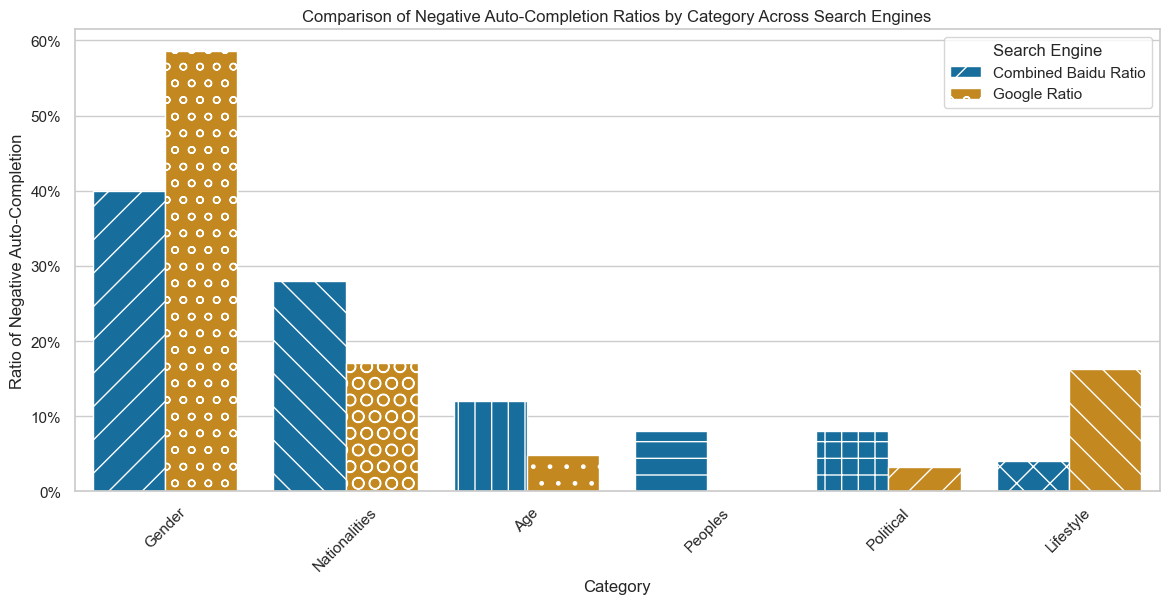

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Assuming baidu_template_1, baidu_template_2, yahoo, google, duckduckgo are already defined datasets

# Combine Baidu Template 1 and 2 and remove duplicates based on 'group'
combined_baidu = pd.concat([baidu_template_1, baidu_template_2]).drop_duplicates(subset='group')

# Identify common groups across all datasets including the combined Baidu dataset
common_groups = set(combined_baidu['English']).intersection(set(google['group']))

# Filter each dataset for common groups
combined_baidu_common = combined_baidu[combined_baidu['English'].isin(common_groups)]

google_common = google[google['group'].isin(common_groups)]


# Filter out negative reviews for each dataset
negative_reviews_combined_baidu = combined_baidu_common[combined_baidu_common['common_sentiment_rating'] == 3.0]

negative_reviews_google = google_common[google_common['common_sentiment_rating'] == 3.0]


# Calculate the ratio of negative reviews in each category for each dataset
category_ratio_combined_baidu = negative_reviews_combined_baidu['category'].value_counts(normalize=True).reset_index()
category_ratio_combined_baidu.columns = ['Category', 'Combined Baidu Ratio']

# category_ratio_yahoo = negative_reviews_yahoo['category'].value_counts(normalize=True).reset_index()
# category_ratio_yahoo.columns = ['Category', 'Yahoo Ratio']

category_ratio_google = negative_reviews_google['category'].value_counts(normalize=True).reset_index()
category_ratio_google.columns = ['Category', 'Google Ratio']

# category_ratio_duckduckgo = negative_reviews_duckduckgo['category'].value_counts(normalize=True).reset_index()
# category_ratio_duckduckgo.columns = ['Category', 'DuckDuckGo Ratio']

# Merge the ratio dataframes for comparison
merged_ratios = category_ratio_combined_baidu.merge(category_ratio_google, on='Category', how='outer')


# Replace NaN values with 0 (indicating no negative reviews in that category for the dataset)
merged_ratios.fillna(0, inplace=True)

# Melting the DataFrame for easier plotting with seaborn
melted_ratios = pd.melt(merged_ratios, id_vars='Category', var_name='Dataset', value_name='Ratio')

# Seaborn settings for a colorblind-friendly plot
sns.set(style="whitegrid", palette="colorblind")

# Plotting using seaborn
plt.figure(figsize=(14, 6))
sns_plot = sns.barplot(x='Category', y='Ratio', hue='Dataset', data=melted_ratios)

# Adding hatch patterns for better distinction
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for bar, hatch in zip(sns_plot.patches, hatches * len(melted_ratios['Dataset'].unique())):
    bar.set_hatch(hatch)

# Formatting y-axis labels as percentages
sns_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Comparison of Negative Auto-Completion Ratios by Category Across Search Engines')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Ratio of Negative Auto-Completion')
plt.legend(title='Search Engine')

plt.show()


In [38]:
# Correcting the approach to identify common groups across all datasets
common_groups = set(combined_baidu['English']).intersection(
    set(yahoo['group']), set(google['group']), set(duckduckgo['group']))
# Identify common groups across all datasets including the combined Baidu dataset
common_groups = set(combined_baidu['English']).intersection(set(google['group']))
# Filter each dataset for common groups again with the corrected approach
combined_baidu_common = combined_baidu[combined_baidu['English'].isin(common_groups)]
# yahoo_common = yahoo[yahoo['group'].isin(common_groups)]
google_common = google[google['group'].isin(common_groups)]
# duckduckgo_common = duckduckgo[duckduckgo['group'].isin(common_groups)]

# Recheck the number of common groups in each category for each dataset
common_groups_baidu = check_common_groups_in_categories(combined_baidu_common)
common_groups_google = check_common_groups_in_categories(google_common)

common_groups_baidu, common_groups_google



({'Age': 4,
  'Gender': 15,
  'Lifestyle': 5,
  'Nationalities': 17,
  'Peoples': 4,
  'Political': 2,
  'Religion': 1},
 {'Age': 4,
  'Gender': 15,
  'Lifestyle': 5,
  'Nationalities': 17,
  'Peoples': 4,
  'Political': 2,
  'Religion': 1})

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

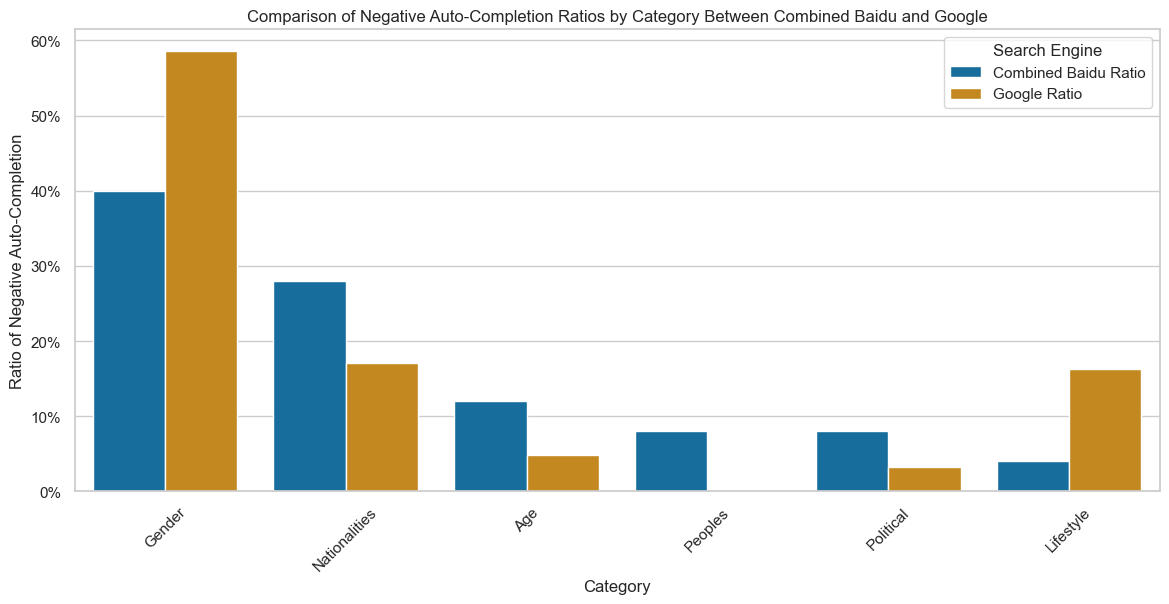

In [35]:
import pandas as pd
import statsmodels.api as sm

# Load the datasets
file_paths = {
    "Baidu Template 1": '../data/temp/modified_baidu_follow_query_template_1.csv',
    "Baidu Template 2": '../data/temp/modified_baidu_follow_query_template_2.csv',
    "DuckDuckGo": '../data/temp/modified_duckduckgo_follow_query.csv',
    "Google": '../data/temp/modified_google_follow_query.csv',
    "Yahoo": '../data/temp/modified_yahoo_follow_query.csv'
}

# Dictionary to hold the DataFrame of each search engine
dfs = {}

# Process each file
for engine, path in file_paths.items():
    df = pd.read_csv(path)
    # Convert 'common_sentiment_rating' to numeric, treating non-numeric as NaN
    df['common_sentiment_rating'] = pd.to_numeric(df['common_sentiment_rating'], errors='coerce')
    dfs[engine] = df

# Function to compare Baidu Template 1 with other search engines for each category using Chi-square test
def compare_baidu_template_1(dfs):
    baidu_engine = "Baidu Template 1"
    other_engines = ["Google", "Yahoo", "DuckDuckGo"]
    results = {}
    categories = set(dfs[baidu_engine]['category'].dropna())

    for category in categories:
        baidu_df = dfs[baidu_engine][dfs[baidu_engine]['category'] == category]

        for other_engine in other_engines:
            other_df = dfs[other_engine][dfs[other_engine]['category'] == category]

            # Count negative sentiment (common_sentiment_rating == 3) and others
            count_negative_baidu = baidu_df['common_sentiment_rating'].eq(3).sum()
            count_others_baidu = baidu_df['common_sentiment_rating'].count() - count_negative_baidu

            count_negative_other = other_df['common_sentiment_rating'].eq(3).sum()
            count_others_other = other_df['common_sentiment_rating'].count() - count_negative_other

            # Construct contingency table
            contingency_table = [[count_negative_baidu, count_others_baidu], 
                                 [count_negative_other, count_others_other]]

            # Perform Chi-square test
            chi2, p, dof, ex = sm.stats.Table2x2(contingency_table).test_nominal_association()

            # Store the results
            results[(baidu_engine, other_engine, category)] = {
                'chi2': chi2,
                'p-value': p
            }

    return results

# Comparing Baidu Template 1 with Google, Yahoo, and DuckDuckGo
comparison_results = compare_baidu_template_1(dfs)
comparison_results


TypeError: cannot unpack non-iterable _Bunch object